In [ ]:
import os, sys
sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
from pathlib import Path

RAW = Path("../data_raw") / "statcast_full.parquet"
df = pd.read_parquet(RAW)
df.shape, df.head()


((120112, 24),
     game_date  game_pk  pitcher  batter pitch_type  release_speed  \
 0  2023-04-07   718693   660593  663743         SL           79.2   
 1  2023-04-07   718693   660593  663743         FF           93.4   
 2  2023-04-07   718693   660593  660821         FF           93.4   
 3  2023-04-07   718693   660593  660821         FC           87.9   
 4  2023-04-07   718693   660593  660821         CH           85.3   
 
    release_pos_x  release_pos_z  pfx_x  pfx_z  ...  strikes inning  \
 0          -2.18           5.61   1.17   0.29  ...        1      9   
 1          -2.09           5.78  -0.74   1.52  ...        0      9   
 2          -2.08           5.79  -0.65   1.52  ...        2      9   
 3          -2.29           5.72   0.19    1.2  ...        1      9   
 4          -2.51            5.6  -1.62   0.49  ...        1      9   
 
   outs_when_up   on_1b  on_2b  on_3b      description  \
 0            1  516416   <NA>   <NA>    hit_into_play   
 1            1  51

![alt text](../images/image.png)

In [6]:
from src.data.quality_checks import null_report, basic_ranges, value_counts_top
null_report(df).head(20)

,null_frac
spin_rate_deprecated,1.000000
on_3b,0.901642
hc_x,0.829109
hc_y,0.829109
on_2b,0.806697
events,0.745279
on_1b,0.687034
release_pos_z,0.000175
pfx_z,0.000175
release_speed,0.000175


In [14]:
df["runner_on_1b"] = df["on_1b"].notna().astype(int)
df["runner_on_2b"] = df["on_2b"].notna().astype(int)
df["runner_on_3b"] = df["on_3b"].notna().astype(int)


In [15]:
basic_ranges(df)

,count,mean,std,min,1%,5%,50%,95%,99%,max
release_speed,120091.0,88.638314,6.07145,38.5,73.5,78.3,89.4,96.8,99.0,103.5
pfx_x,120091.0,-0.101418,0.915477,-2.58,-1.66,-1.46,-0.13,1.39,1.64,2.22
pfx_z,120091.0,0.61217,0.726336,-1.98,-1.33,-0.77,0.66,1.59,1.741,2.5
spin_rate_deprecated,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
inning,120112.0,4.915262,2.582053,1.0,1.0,1.0,5.0,9.0,9.0,12.0
balls,120112.0,0.887214,0.967863,0.0,0.0,0.0,1.0,3.0,3.0,4.0
strikes,120112.0,0.89802,0.827646,0.0,0.0,0.0,1.0,2.0,2.0,2.0


In [16]:
value_counts_top(df, "pitch_type", n=20)
value_counts_top(df, "events", n=30)
value_counts_top(df, "description", n=30)

description
ball                       40682
foul                       20902
hit_into_play              20533
called_strike              20292
swinging_strike            12645
blocked_ball                2619
foul_tip                    1198
swinging_strike_blocked      660
hit_by_pitch                 366
foul_bunt                    174
missed_bunt                   32
pitchout                       6
bunt_foul_tip                  3
Name: count, dtype: int64

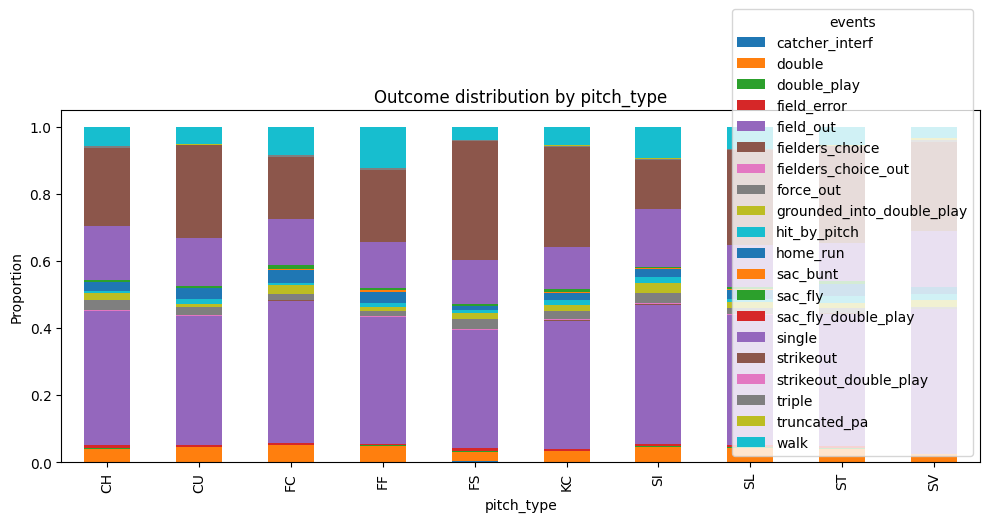

In [20]:
import importlib, src.visualization.plots as plots
importlib.reload(plots)
plots.pitch_type_outcome_bar(df, outcome_col="events", top_n=10)


In [23]:
# Where were HR-pitches located?
importlib.reload(plots)
plots.location_heatmap(df, filter_col="events", filter_val="home_run", bins=32)

KeyError: 'Could not find plate location columns. Expected px/pz or plate_x/plate_z.'

In [13]:
# Handedness splits quick peek
for col in ["p_throws","stand"]:
    display(df[col].value_counts(dropna=False))

p_throws
R    86297
L    33815
Name: count, dtype: int64

stand
R    70848
L    49264
Name: count, dtype: int64